In [1]:
import pandas as pd
import os
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
folder_data = [i for i in os.listdir('/mnt/HC_Volume_18315164/home-jupyter/jupyter-v-kachanovskij-24/shared/Res_Tree') if not i.startswith('.')]

In [3]:
folder_data

['F000545', 'M000547', 'F000570']

In [4]:
# for i in folder_datd:
#     if not i.startswith('.'):
#          print(i)

# scanning = False
# for i in file:
#     if i == '--- Non-deleted saved meals -----------------------\n':
#         scanning = True
#         continue
#     elif i == '-----------------------------------------------------\n':
#         scanning = False
#         continue
#     if scanning:
#         print(i)

In [5]:
p = '/mnt/HC_Volume_18315164/home-jupyter/jupyter-v-kachanovskij-24/shared/Res_Tree/F000545/res_2019.09.11_0.0_6493B6_Container-dat_2125_91-105-165_F000545/meals_list_2.txt'

In [6]:
file = open(p).readlines()

In [7]:
x = ['1', '2', 'str', '3', '4', 'end', '5', '6']

In [8]:
open(p).readlines()

['-------------------------------------------------------\n',
 '-------------------------------------------------------\n',
 'Data log format: Descent DB log\n',
 '\n',
 '    \n',
 '  Intake Params check: INTAKE PARAMS DIFFER FROM THEIR DEFAULTS!!!\n',
 '  Power cycle emulation: disabled\n',
 '\n',
 '  Build Mode:   HB_ITS_ONLY\n',
 '-------------------------------------------------------\n',
 '\n',
 '\n',
 '--- Non-deleted saved meals -----------------------\n',
 ' Meal#;        Date; Start;   End; Flags;    E-IN;    Cbh;    Fat;    Pro;  S. tstamp; End tstamp; Minutes;  Recs; First;  Last;    Type; Frags;\n',
 '     0;  09.01.2020; 10:54; 12:33;  0x84;  247.41;  18.85;  13.58;  12.45; 1578556469; 1578562439;     100;   100;     1;   100; F3-Meal;\n',
 '     1;  09.01.2020; 12:42; 14:11;  0x84;  198.60;  17.00;  10.31;   9.45; 1578562921; 1578568288;      90;    94;   104;   197; F3-Meal;\n',
 '     2;  09.01.2020; 14:31; 16:41;  0x84;  320.71;  23.09;  18.03;  16.53; 1578569494; 1578

In [9]:
all_data = []

In [10]:
scanning = False
for i in file:
    if i == '--- Non-deleted saved meals -----------------------\n':
        scanning = True
        continue
    elif i == '-----------------------------------------------------\n':
        scanning = False
        continue
    if scanning:
        if ' Meal#;' in i:
            col_name = i
            continue
        all_data.append([value.strip() for value in i.split(';')])

In [11]:
[col.strip() for col in col_name.split(';')]

['Meal#',
 'Date',
 'Start',
 'End',
 'Flags',
 'E-IN',
 'Cbh',
 'Fat',
 'Pro',
 'S. tstamp',
 'End tstamp',
 'Minutes',
 'Recs',
 'First',
 'Last',
 'Type',
 'Frags',
 '']

In [12]:
final_col_names = [col.strip() for col in col_name.split(';')]

In [13]:
final_col_names[0:17]

['Meal#',
 'Date',
 'Start',
 'End',
 'Flags',
 'E-IN',
 'Cbh',
 'Fat',
 'Pro',
 'S. tstamp',
 'End tstamp',
 'Minutes',
 'Recs',
 'First',
 'Last',
 'Type',
 'Frags']

In [14]:
meal_df = pd.DataFrame(all_data, columns=final_col_names[0:17])

In [15]:
meal_df.head()

,Meal#,Date,Start,End,Flags,E-IN,Cbh,Fat,Pro,S. tstamp,End tstamp,Minutes,Recs,First,Last,Type,Frags
0,0,09.01.2020,10:54,12:33,0x84,247.41,18.85,13.58,12.45,1578556469,1578562439,100,100,1,100,F3-Meal,
1,1,09.01.2020,12:42,14:11,0x84,198.60,17.00,10.31,9.45,1578562921,1578568288,90,94,104,197,F3-Meal,
2,2,09.01.2020,14:31,16:41,0x84,320.71,23.09,18.03,16.53,1578569494,1578577272,130,130,217,346,F3-Meal,
3,3,09.01.2020,16:57,18:01,0x84,136.57,12.71,6.77,6.20,1578578237,1578582096,65,65,362,426,F3-Meal,
4,4,09.01.2020,18:09,19:46,0x84,193.10,16.25,10.11,9.27,1578582579,1578588367,97,97,434,530,F3-Meal,


In [16]:
meal_df.dtypes

Meal#         object
Date          object
Start         object
End           object
Flags         object
E-IN          object
Cbh           object
Fat           object
Pro           object
S. tstamp     object
End tstamp    object
Minutes       object
Recs          object
First         object
Last          object
Type          object
Frags         object
dtype: object

In [17]:
meal_df = meal_df.astype({'Minutes': 'int', 'Pro': 'float'})

In [18]:
meal_df

,Meal#,Date,Start,End,Flags,E-IN,Cbh,Fat,Pro,S. tstamp,End tstamp,Minutes,Recs,First,Last,Type,Frags
0,0,09.01.2020,10:54,12:33,0x84,247.41,18.85,13.58,12.45,1578556469,1578562439,100,100,1,100,F3-Meal,
1,1,09.01.2020,12:42,14:11,0x84,198.60,17.00,10.31,9.45,1578562921,1578568288,90,94,104,197,F3-Meal,
2,2,09.01.2020,14:31,16:41,0x84,320.71,23.09,18.03,16.53,1578569494,1578577272,130,130,217,346,F3-Meal,
3,3,09.01.2020,16:57,18:01,0x84,136.57,12.71,6.77,6.20,1578578237,1578582096,65,65,362,426,F3-Meal,
4,4,09.01.2020,18:09,19:46,0x84,193.10,16.25,10.11,9.27,1578582579,1578588367,97,97,434,530,F3-Meal,
5,5,09.01.2020,20:43,22:46,0x84,271.64,19.42,15.31,14.04,1578591804,1578599161,123,103,587,689,F3-Meal,
6,6,09.01.2020,22:46,00:14,0x84,171.02,15.29,8.67,7.95,1578599161,1578604467,89,101,689,789,F3-Meal,
7,0,09.01.2020,22:46,00:14,0x84,171.02,15.29,8.67,7.95,1578599161,1578604467,89,101,689,789,F3-Meal,
8,1,10.01.2020,01:22,04:41,0x84,359.83,29.25,19.17,17.57,1578608567,1578620506,199,203,861,1063,F3-Meal,
9,2,10.01.2020,14:26,15:48,0x84,167.74,15.08,8.48,7.78,1578655600,1578660484,82,82,1645,1726,F3-Meal,


In [19]:
user_meal_df = meal_df[['Date', 'Pro', 'Minutes']]

In [20]:
meal_df['Date'] = pd.to_datetime(user_meal_df.Date)

In [21]:
user_meal_df = meal_df[['Date', 'Pro', 'Minutes']]

In [22]:
user_meal_df.groupby('Date') \
    .agg({'Minutes': 'sum'})

,Minutes
Date,
2020-09-01,783
2020-10-01,778
2020-11-01,750


In [23]:
pd.to_datetime(user_meal_df.Date)


0    2020-09-01
1    2020-09-01
2    2020-09-01
3    2020-09-01
4    2020-09-01
5    2020-09-01
6    2020-09-01
7    2020-09-01
8    2020-10-01
9    2020-10-01
10   2020-10-01
11   2020-10-01
12   2020-10-01
13   2020-10-01
14   2020-10-01
15   2020-11-01
16   2020-11-01
17   2020-11-01
18   2020-11-01
19   2020-11-01
20   2020-11-01
Name: Date, dtype: datetime64[ns]

In [24]:
user_meal_df.shape[0]

21

In [25]:
x= user_meal_df.shape[1]
y = user_meal_df.shape[0]

df_shape = 'df has {} rows and {} columns'.format(y, x) 

In [26]:
df_shape

'df has 21 rows and 3 columns'

In [27]:
df = pd.DataFrame(dict(age=[5, 6, np.NaN],
                   born=[pd.NaT, pd.Timestamp('1939-05-27'),
                         pd.Timestamp('1940-04-25')],
                   name=['Alfred', 'Batman', ''],
                   toy=[None, 'Batmobile', 'Joker']))

In [28]:
df.drop(columns=['sex', 'age'])

KeyError: "['sex'] not found in axis"

In [29]:
na_number

NameError: name 'na_number' is not defined

In [30]:
numbers = [1, -2, 3, 0, -3, 2]
positive_numbers = []

In [31]:
for i in numbers:
    if i > 0:
        positive_numbers.append(i)
    elif i < 0:
        continue
    else:
        break
positive_numbers

[1, 3]

In [32]:
taxi = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-v-kachanovskij-24/Lesson3/3_taxi_peru.csv', sep = ';')

In [33]:
taxi

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,16.11.2010 16:44,"-12,13983536","-77,02355957",16.11.2010 17:29,"-12,05537033","-77,0413208",drop off,"-12,10825481","-77,0272739",16.11.2010 17:02,iPhone,5.0,5.0
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,01.06.2010 0:34,"-12,13874817","-76,99536133",01.06.2010 0:37,"-12,12465668","-77,02886963",not found,NaN,NaN,NaN,iPhone,NaN,NaN
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,31.05.2010 5:01,"-12,12453079","-77,02780151",31.05.2010 5:04,"-12,13883209","-76,99530029",not found,NaN,NaN,NaN,iPhone,NaN,NaN
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,01.06.2010 0:29,"-12,13885117","-76,99530029",01.06.2010 0:32,"-12,12458801","-77,02896118",not found,NaN,NaN,NaN,iPhone,NaN,NaN
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,reserved,11.09.2010 23:55,"-12,08995438","-76,92626953",12.09.2010 1:07,"-12,02223206","-77,10638428",drop off,"-12,08311558","-76,9277072",11.09.2010 23:50,iPhone,4.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23106,4a18ea5737ce0ffecaf20b305a0e2c86,8998bb370b5f0cec43a373adebba0c72,d665fb9f75ef5d9cd0fd89479380ba78,16cbe35db7fff70fbc8251b4cda9fdc9,executive,reserved,31.07.2010 13:15,"-12,08974075","-77,04699707",31.07.2010 13:27,"-12,08352661","-77,05044556",drop off,"-12,08973527","-77,04787016",31.07.2010 13:15,iPhone,5.0,5.0
23107,f1e4317f2c17991dd90d1cd17ae0d399,5f8a6ffef0ea5df78a8ee890267b60ec,17c21284245ff240c7212732991c2373,716a697375634f32a06d692b0448f13d,executive,asap,02.10.2010 5:26,"-12,09253011","-77,02875271",02.10.2010 5:56,"-12,07776001","-77,05623798",drop off,"-12,10639693","-77,04028948",02.10.2010 5:39,Android,NaN,5.0
23108,1e44c0fd0a266c3719ff30410b257bce,c0ffb6f6cd801004dd8609c12277c2d1,4851ee4c867c9b49b909c1adb76c31e9,4851ee4c867c9b49b909c1adb76c538e,executive,asap,21.09.2010 9:56,"-12,1275637","-77,02642288",21.09.2010 10:18,"-12,10529838","-77,04735249",drop off,"-12,12605017","-77,01882491",21.09.2010 10:05,Android,0.0,0.0
23109,7073883383b89ad289e864022150cdd7,c0ffb6f6cd801004dd8609c12277c2d1,56f59b58bcbbd1cdabc3652e713134c2,924d4f0e7554566623e8ebb3904a7b0c,executive,reserved,29.04.2010 4:30,"-12,019468","-77,1077669",29.04.2010 5:11,"-12,09909987","-77,03475013",drop off,"-12,0710933","-77,09855131",29.04.2010 4:23,Android,NaN,5.0


In [34]:
taxi.start_at = pd.to_datetime(taxi.start_at)
taxi.end_at = pd.to_datetime(taxi.end_at)
taxi.arrived_at = pd.to_datetime(taxi.arrived_at)


In [35]:
taxi.dtypes

journey_id                  object
user_id                     object
driver_id                   object
taxi_id                     object
icon                        object
start_type                  object
start_at            datetime64[ns]
start_lat                   object
start_lon                   object
end_at              datetime64[ns]
end_lat                     object
end_lon                     object
end_state                   object
driver_start_lat            object
driver_start_lon            object
arrived_at          datetime64[ns]
source                      object
driver_score               float64
rider_score                float64
dtype: object

In [36]:
taxi = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-v-kachanovskij-24/Lesson3/3_taxi_peru.csv', sep = ';')
taxi.start_at = pd.to_datetime(taxi.start_at)
taxi.end_at = pd.to_datetime(taxi.end_at)
taxi.arrived_at = pd.to_datetime(taxi.arrived_at)
taxi = taxi.query("start_type == 'asap' or start_type == 'reserved'")


In [37]:

taxi['wait_time'] = taxi.arrived_at - taxi.start_at
taxi.wait_time = taxi.wait_time.astype('timedelta64[m]')

In [38]:
taxi

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score,wait_time
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,"-12,05537033","-77,0413208",drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,iPhone,5.0,5.0,18.0
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-01-06 00:34:00,"-12,13874817","-76,99536133",2010-01-06 00:37:00,"-12,12465668","-77,02886963",not found,NaN,NaN,NaT,iPhone,NaN,NaN,NaN
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-05-31 05:01:00,"-12,12453079","-77,02780151",2010-05-31 05:04:00,"-12,13883209","-76,99530029",not found,NaN,NaN,NaT,iPhone,NaN,NaN,NaN
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-01-06 00:29:00,"-12,13885117","-76,99530029",2010-01-06 00:32:00,"-12,12458801","-77,02896118",not found,NaN,NaN,NaT,iPhone,NaN,NaN,NaN
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,reserved,2010-11-09 23:55:00,"-12,08995438","-76,92626953",2010-12-09 01:07:00,"-12,02223206","-77,10638428",drop off,"-12,08311558","-76,9277072",2010-11-09 23:50:00,iPhone,4.0,5.0,-5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23106,4a18ea5737ce0ffecaf20b305a0e2c86,8998bb370b5f0cec43a373adebba0c72,d665fb9f75ef5d9cd0fd89479380ba78,16cbe35db7fff70fbc8251b4cda9fdc9,executive,reserved,2010-07-31 13:15:00,"-12,08974075","-77,04699707",2010-07-31 13:27:00,"-12,08352661","-77,05044556",drop off,"-12,08973527","-77,04787016",2010-07-31 13:15:00,iPhone,5.0,5.0,0.0
23107,f1e4317f2c17991dd90d1cd17ae0d399,5f8a6ffef0ea5df78a8ee890267b60ec,17c21284245ff240c7212732991c2373,716a697375634f32a06d692b0448f13d,executive,asap,2010-02-10 05:26:00,"-12,09253011","-77,02875271",2010-02-10 05:56:00,"-12,07776001","-77,05623798",drop off,"-12,10639693","-77,04028948",2010-02-10 05:39:00,Android,NaN,5.0,13.0
23108,1e44c0fd0a266c3719ff30410b257bce,c0ffb6f6cd801004dd8609c12277c2d1,4851ee4c867c9b49b909c1adb76c31e9,4851ee4c867c9b49b909c1adb76c538e,executive,asap,2010-09-21 09:56:00,"-12,1275637","-77,02642288",2010-09-21 10:18:00,"-12,10529838","-77,04735249",drop off,"-12,12605017","-77,01882491",2010-09-21 10:05:00,Android,0.0,0.0,9.0
23109,7073883383b89ad289e864022150cdd7,c0ffb6f6cd801004dd8609c12277c2d1,56f59b58bcbbd1cdabc3652e713134c2,924d4f0e7554566623e8ebb3904a7b0c,executive,reserved,2010-04-29 04:30:00,"-12,019468","-77,1077669",2010-04-29 05:11:00,"-12,09909987","-77,03475013",drop off,"-12,0710933","-77,09855131",2010-04-29 04:23:00,Android,NaN,5.0,-7.0


In [39]:
wait_drivers = taxi.query("start_type == 'reserved' and wait_time > 0.0") \
    .groupby('driver_id', as_index= True) \
    .agg({'driver_id': 'count'})

In [40]:
#wait_drivers_lesson = wait_drivers.query('driver_id == 68')

In [41]:
wait_drivers.idxmax()

driver_id    406921adcca37705ef527b4246c0cfea
dtype: object

In [42]:
taxi.driver_id[24]

nan

In [43]:
path_to_file = '/mnt/HC_Volume_18315164/home-jupyter/jupyter-v-kachanovskij-24/Lesson3/3_taxi_peru.csv'
taxi_2 = pd.read_csv(path_to_file, sep = ';')
taxi_2.start_at = pd.to_datetime(taxi.start_at)
taxi_2.end_at = pd.to_datetime(taxi.end_at)
taxi_2.arrived_at = pd.to_datetime(taxi.arrived_at)
taxi_2 = taxi_2.query("start_type == 'asap' or start_type == 'reserved'")

In [44]:
taxi_2['month'] = taxi_2.start_at.dt.month
taxi_2['weekday'] = taxi_2.start_at.dt.strftime('%w')

In [45]:
taxi_2.weekday

0        2
1        3
2        1
3        3
4        2
        ..
23106    6
23107    3
23108    2
23109    4
23110    2
Name: weekday, Length: 23091, dtype: object

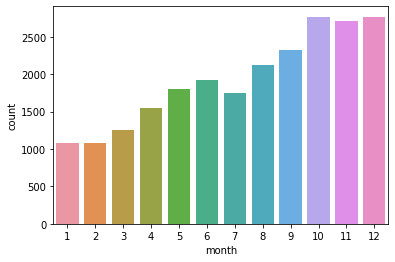

In [46]:
sns.countplot(x='month', data = taxi_2)

/opt/tljh/user/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


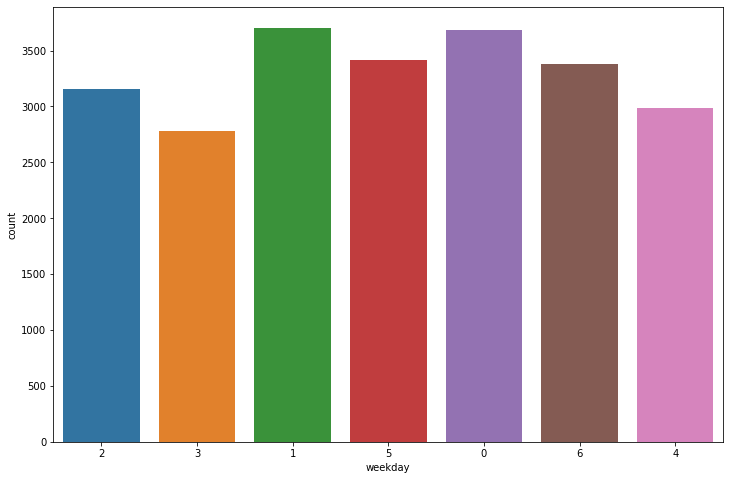

In [47]:
plt.figure(figsize=(12, 8))
sns.countplot(taxi_2['weekday'])


In [48]:
taxi_2.weekday

0        2
1        3
2        1
3        3
4        2
        ..
23106    6
23107    3
23108    2
23109    4
23110    2
Name: weekday, Length: 23091, dtype: object

In [49]:
taxi_2 = taxi_2.groupby('month', as_index = False).agg({'user_id': pd.Series.nunique})

In [50]:
taxi_2

,month,user_id
0,1,286
1,2,271
2,3,310
3,4,343
4,5,390
5,6,412
6,7,424
7,8,446
8,9,442
9,10,482


/opt/tljh/user/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


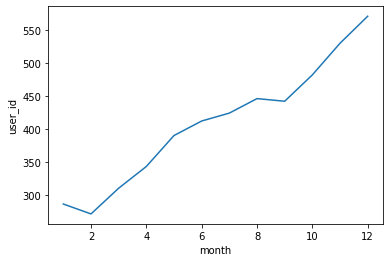

In [52]:
sns.lineplot(taxi_2.month, taxi_2.user_id)

In [ ]:
#MiniProject

In [136]:
path_to_file = '/mnt/HC_Volume_18315164/home-jupyter/jupyter-v-kachanovskij-24/Lesson4/'
all_df = pd.DataFrame
flag = False
for path, dirs, files in os.walk('data'):
    if files.count('data.csv'):
        files_name = files[0]
    else:
        continue
    tmp = (path_to_file + '{}' + '/' + '{}').format(path, files_name)
    fileTmp1 = pd.read_csv(tmp).drop(columns ='Unnamed: 0')# Достали ЦСВ и правильно прочитали
    fileTmp1['name'] = tmp.split("/")[-2]
    fileTmp1['date'] = tmp.split("/")[-3]
    if flag == False:
        all_df = fileTmp1
        flag = True
    else:
        all_df = pd.concat([all_df, fileTmp1])
all_df

,product_id,quantity,name,date
0,36,4,Rostislav_Petrov,2020-12-08
1,24,2,Rostislav_Petrov,2020-12-08
2,23,1,Rostislav_Petrov,2020-12-08
3,27,5,Rostislav_Petrov,2020-12-08
4,32,3,Rostislav_Petrov,2020-12-08
...,...,...,...,...
0,79,3,Anton_Smirnov,2020-12-09
1,33,1,Anton_Smirnov,2020-12-09
2,81,3,Anton_Smirnov,2020-12-09
3,70,4,Anton_Smirnov,2020-12-09


In [159]:
lesson3 = all_df.groupby(['name', 'product_id', 'date'], as_index = False) \
    .agg({'quantity': 'sum'}) \
    .sort_values('quantity', ascending=False)

In [164]:
lesson5 = all_df.groupby('date', as_index = False) \
    .agg({'quantity': 'sum'}) \
    .sort_values('quantity', ascending=False)

In [204]:
lesson3 = all_df.drop_duplicates(subset=['product_id', 'date', 'name']).groupby(['name', 'product_id'], as_index=False).agg({'date':'count','product_id':'count','name':'count'}).sort_values('product_id', ascending=False)
lesson3

,date,product_id,name
37,2,2,2
92,2,2,2
0,1,1,1
109,1,1,1
103,1,1,1
...,...,...,...
54,1,1,1
55,1,1,1
56,1,1,1
57,1,1,1


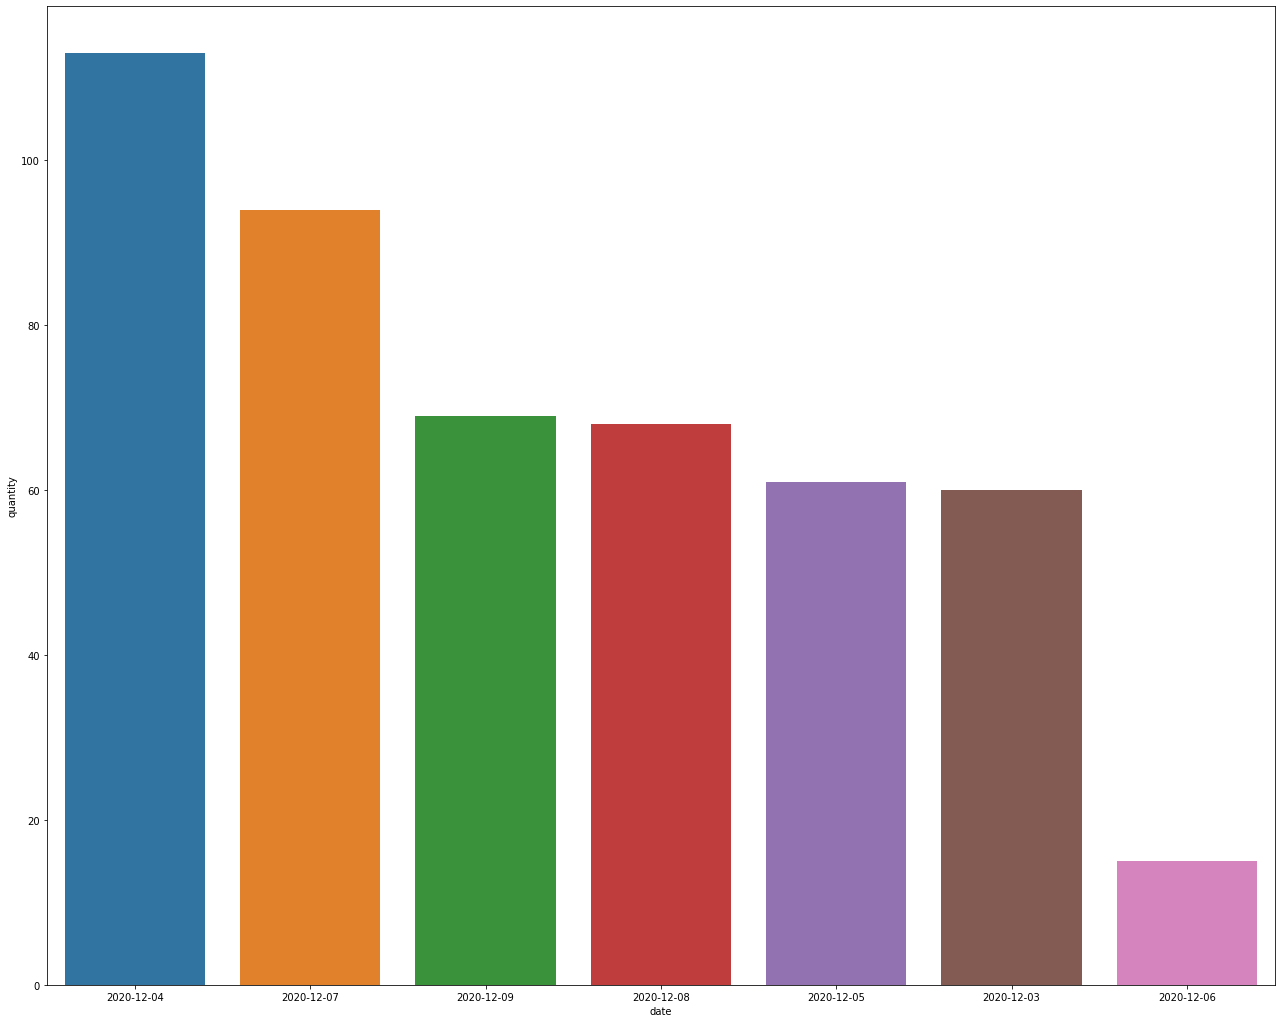

In [167]:
plt.figure(figsize=(22, 18))
barplot_all_df = lesson5.head(10)
sns.barplot(x='date', y='quantity', data=lesson5)

In [158]:
lesson3.query('product_id == 56')

,name,product_id,quantity
31,Alexey_Smirnov,56,5
45,Anton_Petrov,56,5
143,Vasiliy_Fedorov,56,4
139,Rostislav_Smirnov,56,4
